**Libraries/Imports**

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


**Data Preprocessing**

In [14]:
# Reading in raw Pokemon Database.csv
raw = pd.read_csv('Pokemon Database.csv')

# Cleaning string values
for index, pokemon in raw.iterrows():
    for column in raw.columns:
        if isinstance(pokemon[column], str):
            raw.at[index, column] = pokemon[column][1:-1]

# Converting Alternate Form Name to Correct Names
raw["Alternate Form Name"] = raw["Alternate Form Name"].replace({
    "Hisui": "Hisuian",
    "Alola": "Alolan",
    "Galar": "Galarian"
})    

# Updating Pokemon Names and Handling Missing Values
for index, pokemon in raw.iterrows():
    if pd.isna(pokemon['Legendary Type']):
        raw.at[index, "Legendary Type"] = "Regular"
    if pd.isna(pokemon["Secondary Type"]):
        raw.at[index, "Secondary Type"] = pokemon["Primary Type"]     
    alternate_form = pokemon['Alternate Form Name']
    if not pd.isna(alternate_form) and isinstance(alternate_form, str):
        if alternate_form in ["Mega X", "Mega Y"]:
            raw.at[index, "Pokemon Name"] = f"Mega {raw.at[index, 'Pokemon Name']} {alternate_form[-1]}"
        elif pokemon["Pokemon Name"] in ["Unown", "Hoopa"]:
            raw.at[index, "Pokemon Name"] = f"{raw.at[index, 'Pokemon Name']} {alternate_form}"
        else:
            raw.at[index, "Pokemon Name"] = f"{alternate_form} {raw.at[index, 'Pokemon Name']}"

# Selecting Relevant Columns
relevant = raw[['Pokemon Id', 'Pokedex Number', 'Pokemon Name',
       'Alternate Form Name', 'Original Pokemon ID', 'Legendary Type',
       'Pokemon Height', 'Pokemon Weight', 'Primary Type', 'Secondary Type', 
       'Male Ratio', 'Female Ratio', 'Base Happiness', 'Health Stat', 'Attack Stat',
       'Defense Stat', 'Special Attack Stat', 'Special Defense Stat',
       'Speed Stat', 'Base Stat Total', 'Health EV', 'Attack EV', 'Defense EV',
       'Special Attack EV', 'Special Defense EV', 'Speed EV', 'EV Yield Total',
       'Catch Rate', 'Experience Growth', 'Experience Growth Total', 'Egg Cycle Count']]

# Remove Gigantamax Forms
relevant = relevant.loc[relevant['Alternate Form Name'] != 'Gigantamax']
relevant = relevant.reset_index()

# Define Features for Transformation
features = ['Legendary Type', 'Pokemon Height', 'Pokemon Weight', 'Primary Type', 'Secondary Type',
            'Male Ratio', 'Female Ratio', 'Base Happiness', 'Health Stat', 'Attack Stat', 'Defense Stat', 
            'Special Attack Stat', 'Special Defense Stat', 'Speed Stat', 'Base Stat Total', 'Health EV', 
            'Attack EV', 'Defense EV', 'Special Attack EV', 'Special Defense EV', 'Speed EV', 
            'EV Yield Total', 'Catch Rate', 'Experience Growth', 'Experience Growth Total', 'Egg Cycle Count'] 

# Define Numerical Features
numerical_features = [col for col in features if col not in ['Legendary Type', 'Experience Growth', 'Primary Type', 'Secondary Type']]

# Apply Label Encoding to Typings (For Classification)
label_encoder_primary = LabelEncoder()
label_encoder_secondary = LabelEncoder()

relevant['Primary Typing Label'] = label_encoder_primary.fit_transform(relevant['Primary Type'])
relevant['Secondary Typing Label'] = label_encoder_secondary.fit_transform(relevant['Secondary Type'])

# Define One-Hot Encoding for Categorical Features, Scaling Values
categorical_features = ['Legendary Type', 'Experience Growth']
transformer = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),  
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  
])

# Apply Transformations
transformed = transformer.fit_transform(relevant[features])
encoded_feature_names = transformer.get_feature_names_out()

# Convert to DataFrame
processed = pd.DataFrame(transformed, columns=encoded_feature_names)

# Add Primary & Secondary Typing Labels
processed['Primary Typing Label'] = relevant['Primary Typing Label']
processed['Secondary Typing Label'] = relevant['Secondary Typing Label']

# Save Processed Data
print(processed.shape)
processed.to_csv('processed_data.csv', index=False)

(1350, 34)


**Splitting Test and Train Datasets**

In [15]:
# Defining Features and Labels Matricies
X = processed.drop(columns=['Primary Typing Label', 'Secondary Typing Label'])
y = processed[['Primary Typing Label']]

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Decision Tree**

Accuracy: 0.4222222222222222
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.42      0.42        26
           1       0.00      0.00      0.00        16
           2       0.62      0.56      0.59         9
           3       0.19      0.23      0.21        13
           4       0.67      0.67      0.67        12
           5       0.36      0.44      0.40         9
           6       0.42      0.62      0.50        13
           7       0.00      0.00      0.00         0
           8       0.42      0.71      0.53         7
           9       0.41      0.65      0.50        17
          10       0.30      0.38      0.33         8
          11       0.25      0.22      0.24         9
          12       0.49      0.53      0.51        32
          13       0.12      0.09      0.11        11
          14       0.67      0.45      0.54        22
          15       0.73      0.46      0.56        24
          16       0.60      

c:\Users\T S E T\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\T S E T\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\T S E T\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

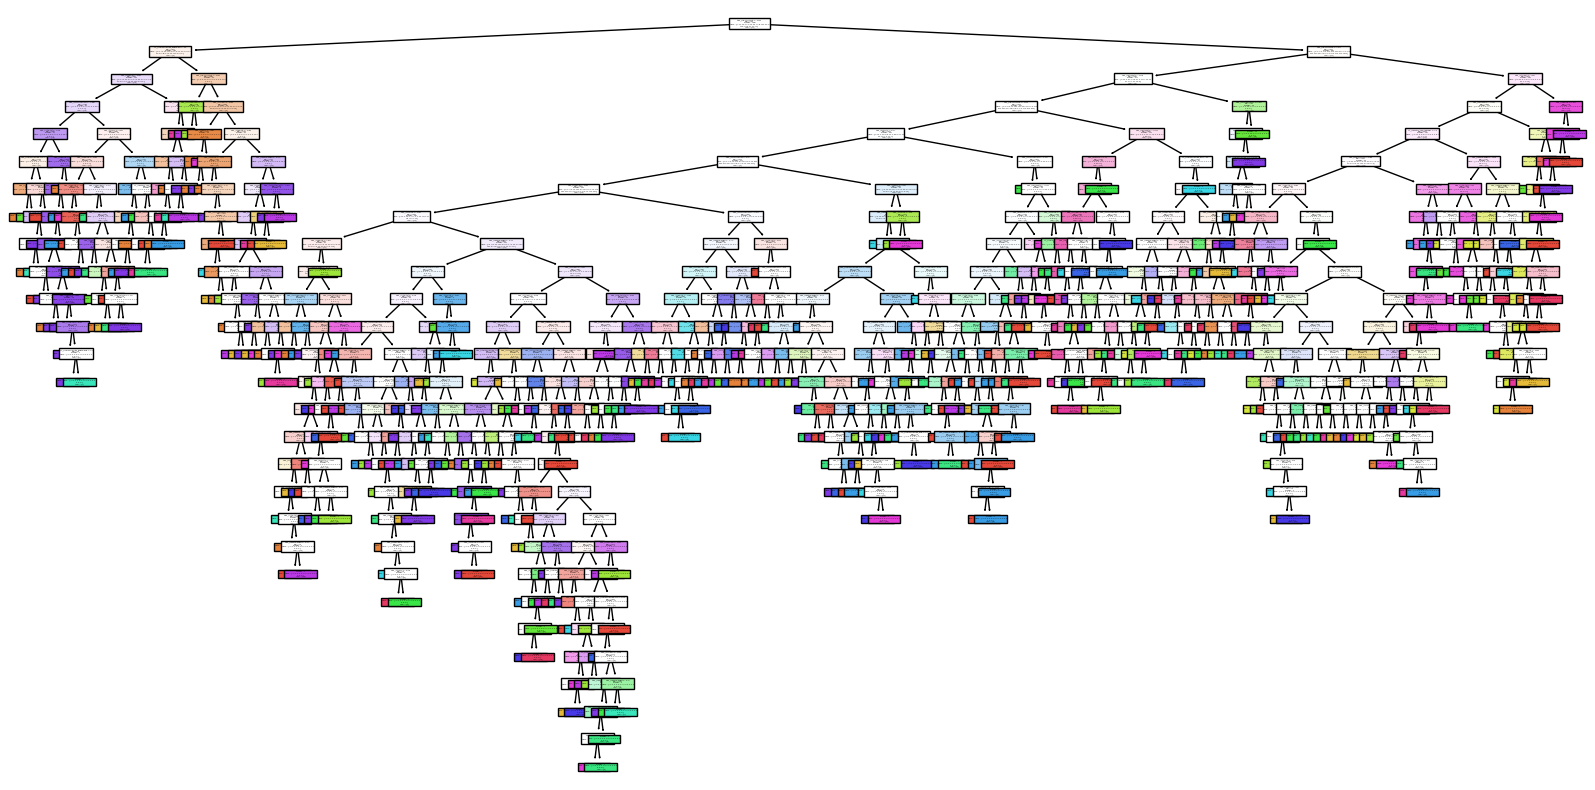

In [20]:
clf = DecisionTreeClassifier(random_state=42)  
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=True)
plt.show()

**Random Forest**

In [22]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

feature_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))

c:\Users\T S E T\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 0.45185185185185184
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.46      0.52        26
           1       0.29      0.12      0.17        16
           2       0.50      0.89      0.64         9
           3       0.35      0.46      0.40        13
           4       0.73      0.67      0.70        12
           5       0.44      0.44      0.44         9
           6       0.25      0.38      0.30        13
           8       0.62      0.71      0.67         7
           9       0.21      0.35      0.27        17
          10       0.38      0.75      0.50         8
          11       0.00      0.00      0.00         9
          12       0.57      0.72      0.64        32
          13       0.00      0.00      0.00        11
          14       0.64      0.41      0.50        22
          15       0.90      0.38      0.53        24
          16       0.55      0.55      0.55        11
